In [1]:
import numpy as np
from model.base import normal_cap, normal_ci
import matplotlib.pyplot as plt

Example parameters

In [2]:
risk_tolerance_mean=0.7
risk_tolerance_stdev=0.2

herding_behavior_mean=0.7
herding_behavior_stdev=0.2

# spreading_rate=normal_ci(2.41, 3.90, 20)

## Converting parameters from mean and var (normal distribution) to alpha and beta (beta distribution)

In [4]:
def check_var(mean, var):
    assert var < mean*(1 - mean), "Variance assertion failed."

def convert(mean, var):
    check_var(mean, var)
    alpha = mean*(mean*(1-mean)/var - 1)
    beta = (1-mean)*(mean*(1-mean)/var - 1)
    return alpha, beta

alpha, beta = convert(risk_tolerance_mean, risk_tolerance_stdev**2)

Drawing random numbers

In [5]:
n = 100000
normal_list = []
beta_list = []

for i in range(n):
    normal_list.append(normal_cap(risk_tolerance_mean, risk_tolerance_stdev))
    beta_list.append(np.random.beta(alpha,beta))

Plotting results

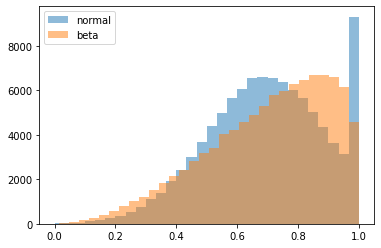

In [8]:
bins = 30
plt.hist(normal_list, bins = bins, alpha=0.5, label='normal');
plt.hist(beta_list, bins = bins, alpha=0.5, label='beta');
plt.legend(loc='upper left')
plt.show()

## Using sample size
Trying to convert from `mean` and `sample_size` to `alpha` and `beta` using the equations provided in the slack channel.

In [6]:
def convert_sample_size(mean, sample_size=10):
    alpha = mean * sample_size
    beta = sample_size - alpha
    return alpha, beta

In [13]:
n = 100000
alpha, beta = convert_sample_size(0.5, 10)
normal_list = []
beta_list = []

for i in range(n):
    normal_list.append(normal_cap(risk_tolerance_mean, risk_tolerance_stdev))
    beta_list.append(np.random.beta(alpha,beta))

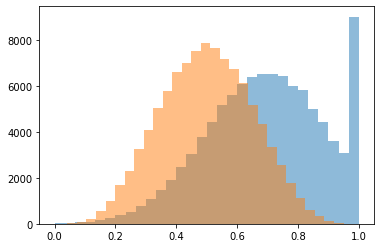

In [14]:
bins = 30
plt.hist(normal_list, bins = bins, alpha=0.5, label='normal');
plt.hist(beta_list, bins = bins, alpha=0.5, label='beta');

Doesn't seem to make sense for large values of `sample_size`... 

## Evaluating numbers generated by normal_ci

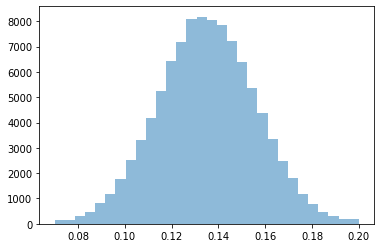

In [34]:
n = 100000
normal_ci_list = []

for i in range(n):
    #normal_ci_list.append(normal_ci(0, 0.5, 1))
    #normal_ci_list.append(normal_ci(0.174, 0.796, 10))
    normal_ci_list.append(normal_ci(0.07, 0.2, 0.4))


bins = 30
plt.hist(normal_ci_list, bins = bins, alpha=0.5, label='normal');

Results are strange... best results are obtained when `0<n<1` which is unexpected if `n` represents sample size.

# New beta functions
-- in progress -- 

In [35]:
def convert(mean, stdev):
    """Converts mean and standard deviation parameters into alpha and beta to be used in the beta distribution."""
    var = stdev ** 2
    assert var < mean * (1 - mean), "Variance assertion failed."
    alpha = mean * (mean * (1-mean)/var - 1)
    beta = (1-mean) * (mean * (1-mean)/var - 1)
    return alpha, beta


def beta_distribution(mean, stdev):
    """Draws random values from a beta distribution using alpha and beta parameters derived from mean and standard
    deviation."""
    alpha, beta = convert(mean, stdev)
    return np.random.beta(alpha, beta)

def beta_range(lower_bound, upper_bound):
    """Draws a random number from a beta distribution with parameters alpha = 2 and beta = 2 (this assures that the values will stay in the range [0, 1]. Then rescales the values to the desired range."""
    assert lower_bound < upper_bound, "Parameter lower_bound must be smaller than upper_bound."
    return (np.random.beta(2, 2) * (upper_bound - lower_bound)) + lower_bound

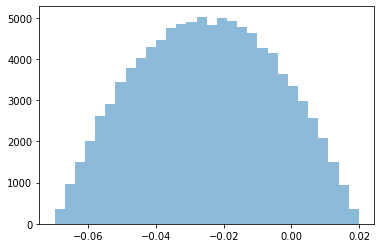

In [37]:
n = 100000
beta_list = []

for i in range(n):
    beta_list.append(beta_range(-0.07, 0.02))


bins = 30
plt.hist(beta_list, bins = bins, alpha=0.5, label='beta');